<a href="https://colab.research.google.com/github/AleksandraJuras2000/Kurs_Udemi/blob/main/07_sieci_neuronowe/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential     # modele gdzie ustawiamy warstwa po warstwie
from tensorflow.keras.layers import Flatten       # wypłaszczenie danych 8x8 --> 64 teraz mamy do tego funkcje
from tensorflow.keras.layers import Dense         # standardowa warstwa w sieciach neuronowych, warstwa gęsto połączona
from tensorflow.keras.layers import Dropout       # kontroluje przeuczenie modelu, porzuca pewnien procent neuronów w warstwie ukrytej

In [2]:
np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.17.1


## ZAŁADOWANIE I PRZYGOTOWANIE DANYCH

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()  #zwraca od razu ziór treningowy i testowy

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')
# do sieci neuronowych wrzucamy raczej dane zestandaryzowane bedziemy musieli jeszcze przygotowac dane czyli dzielimy je na 255 czyli przez max wartośc i uzyskujemy
# wartosci z przedziału 0 i 1

X_train[0] shape: (28, 28)


In [7]:
X_train = X_train / 255.  #. wymuszamy dzielenie z liczbą zmiennoprzecinkowa dzieki czemu wynik operacji bedzie liczbą zmiennoprzecinkową, a nie liczba całkowitą
X_test = X_test / 255.

## Eksploracja Danych

(-0.5, 27.5, 27.5, -0.5)

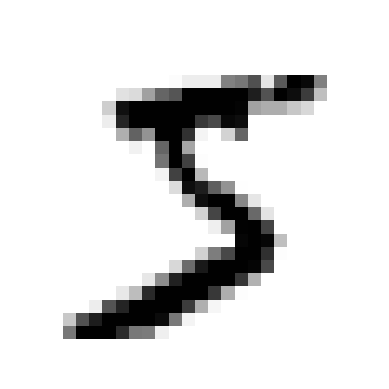

In [8]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

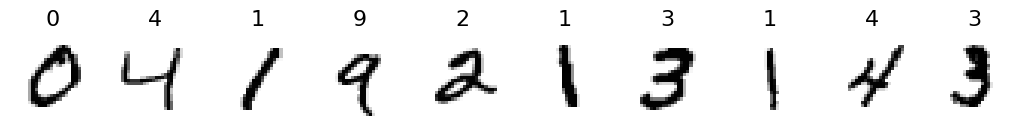

In [12]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

## BUDOWA SIECI NEURONOWEJ

In [13]:
model = Sequential()                    # tworzymy instancje
model.add(Flatten(input_shape=(28, 28)))  # dodajemy teraz kolejne warstwy, i dajemy shape żeby siec wiedziala jakich danych sie spodziewać
model.add(Dense(units=128, activation='relu'))   # popularna f aktywacji która zeruje wartości ujemne
model.add(Dropout(0.2))         # porzuci 20% neuronów w tej warstwie
model.add(Dense(units=10, activation='softmax'))  # warstwo wyjsciowavzawiera 10 neuronow, softmax zwraca nam prawdopodobieństwo poszczególnej klasy

model.compile(optimizer='adam',     # przeczytac o optymalizatorach
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

warstwa flatten nie zawiera żadnych parametrów bo on ama za zadanie wypłaszczyć nasze dane
* 784 jest to wynik mnożenia 28 X 28
* 128 neuronow i mamy ponad 100tys wag
* dropout nie mamy żadnych wag
* i ponad tys parametrow w dense_1

## TRENOWANIE MODELU

In [14]:
history = model.fit(X_train, y_train, epochs=5)  # epochs oznacza ile razy nasz cały zbiór danych przejdzie przez nasza siec

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5458 - loss: 1.7110
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8394 - loss: 0.6010
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8748 - loss: 0.4455
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8883 - loss: 0.3942
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8981 - loss: 0.3541


mamy acuracy po każdej epoce jest coraz lepsze co znaczy że siec coraz lepiej sie uczy.

## OCENA MODELU

In [15]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9161 - loss: 0.2960


[0.2960454821586609, 0.916100025177002]

In [16]:
metrics = pd.DataFrame(history.history)
metrics
# 5 epok wiec 5 wierszy

,accuracy,loss
0,0.682317,1.233925
1,0.848467,0.551288
2,0.878900,0.429568
3,0.892950,0.376425
4,0.900200,0.346339


In [17]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

zależy nam na minilaizacji f straty i maksymalizacji accuracy

## Predykcja na podstawie modelu

In [19]:
model.predict(X_test)
# funkcja zwróci nam wartośc prawdopodobieństwa dla każdej klasy
#jesli mamy 10 klas to mamy 10 wartości w wierszu
# tam gdzei jest najwieksza wartość to bierzemy wtedy ta etykiete

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.00007666107 , 0.000001014766, 0.00008982559 , ..., 0.9953982     , 0.000027483467, 0.0028889913  ],
       [0.008226295   , 0.00007489938 , 0.9339371     , ..., 0.000000005821, 0.0034442411  , 0.00000001108 ],
       [0.000006055503, 0.97745514    , 0.006917601   , ..., 0.004564019   , 0.0029123384  , 0.00044013193 ],
       ...,
       [0.000001437539, 0.000021516596, 0.0000774521  , ..., 0.002291128   , 0.017743375   , 0.13826333    ],
       [0.00246507    , 0.00040086973 , 0.00027239832 , ..., 0.000038414648, 0.26950884    , 0.00027052243 ],
       [0.00013695045 , 0.000000000372, 0.0005344706  , ..., 0.000000000993, 0.00000804389 , 0.000000147244]],
      dtype=float32)

In [23]:
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Aby uzyskać przewidywaną klasę, wybierz klasę z najwyższym prawdopodobieństwem, stosując np.argmax()
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [24]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [25]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([8, 33, 38, 62, 77, 87, 92, 111, 119, 124], dtype='int64')

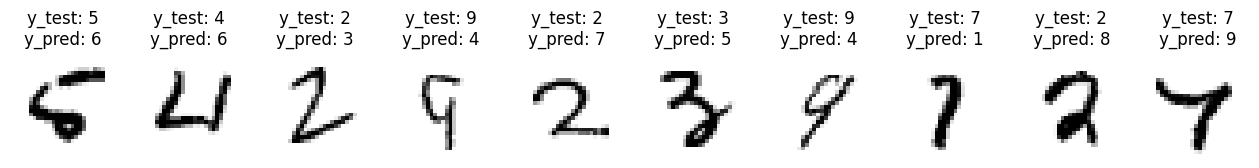

In [27]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()